<a href="https://colab.research.google.com/github/a-parida12/CoLabNotebooks/blob/master/Siamese_Network_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import os
import pandas as pd
import keras.datasets as data
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split


In [47]:
(x_train, y_train), (x_test, y_test) = data.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


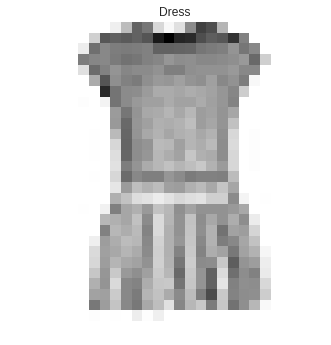

In [48]:
x=3
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]
plt.imshow(x_train[x,:,:])
plt.title(str(fashion_mnist_labels[y_train[x]]))
plt.axis('off')
plt.show()

In [49]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print('Training', x_train.shape, x_train.max())
print('Testing', x_test.shape, x_test.max())

Training (60000, 28, 28, 1) 1.0
Testing (10000, 28, 28, 1) 1.0


In [50]:
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_train)]
print('train groups:', [x.shape[0] for x in train_groups])
print('test groups:', [x.shape[0] for x in test_groups])

train groups: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
test groups: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [51]:
train_groups[7][1].shape

(28, 28, 1)

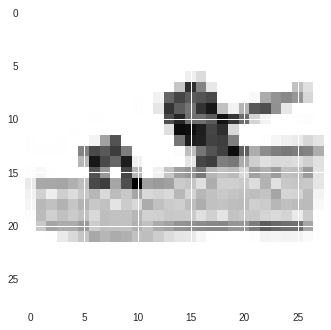

In [52]:
plt.imshow(train_groups[5][2][:,:,0])
#plt.title(str(fashion_mnist_labels[y_train[x]]))
#plt.axis('off')
plt.show()

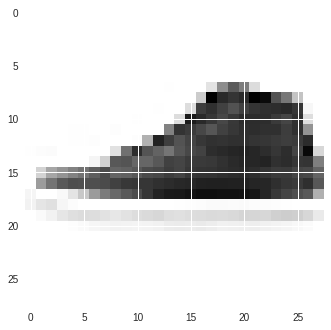

In [53]:
plt.imshow(train_groups[7][2][:,:,0])
#plt.title(str(fashion_mnist_labels[y_train[x]]))
#plt.axis('off')
plt.show()

In [0]:
sneakers=train_groups[7]
sandals=train_groups[5]



In [69]:
sneakers[1].shape

(28, 28, 1)

In [0]:
from random import randint as rnd
from random import shuffle

In [0]:
def get_triples(text='train'):
  if text=='train':
    sneakers=train_groups[7]
    sandals=train_groups[5]
    
  if text=='test':
    sneakers=test_groups[7]
    sandals=test_groups[5]
    
  pos_triples, neg_triples = [], []
  for i in range(sneakers.shape[0]):
    pos_triples.append([sneakers[i],sneakers[rnd(0,sneakers.shape[0]-1)]])
    pos_triples.append([sandals[i],sandals[rnd(0,sandals.shape[0]-1)]])
    neg_triples.append([sneakers[i],sandals[rnd(0,sandals.shape[0]-1)]])
    neg_triples.append([sandals[i],sneakers[rnd(0,sneakers.shape[0]-1)]])
  label=np.concatenate((np.zeros(len(neg_triples)),np.ones(len(pos_triples))))
  pos_triples.extend(neg_triples)
  return [pos_triples, label]
 
  

In [0]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda

In [0]:
class Siamese(object):
  def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        
  def baseModel(self):
    inputs = Input((self.img_rows, self.img_cols,1))
    x = Flatten()(input)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
      
    return x
  
  def getSiamese(self):
    base_network = baseModel(input_shape)
    image_left = Input(shape=input_shape)
    image_right = Input(shape=input_shape)

    vector_left = base_network(image_left)
    vector_right = base_network(image_right)
  
  def train(self):
    InputData,label=get_triples()
    model.fit()
    
    
  def test(self):
    TestData, label=get_triples('test')
    
    


In [0]:
 InputData,label=get_triples('train')

In [61]:

model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
          batch_size=128,
          epochs=epochs,
          validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y))

ValueError: ignored

In [0]:
input_shape = x_train

In [102]:
input_shape

(28, 28, 1)

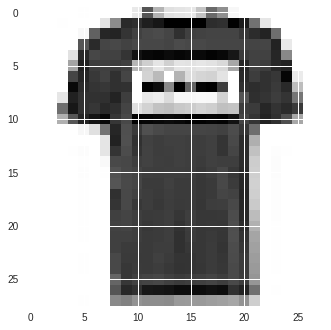

In [105]:
plt.imshow(x_train[1,:,:,0])